#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk 
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes 

#Importing dataset

In [ ]:
df = pd.read_csv('Trainset.csv', encoding='gbk')

In [ ]:
df.head()

,id,rating,review
0,3253,poor,She treats students like they're kids & is ver...
1,2968,good,"I have graduated from UofT over a year ago, bu..."
2,1138,good,"He may not use big words all the time, but he ..."
3,209,good,Dr. Molumby was one of those professors you et...
4,3418,good,She's a little stress because of the class loa...


#Checking the distribution of rating

% for default
good       57.52
poor       28.84
average    13.64
Name: rating, dtype: float64


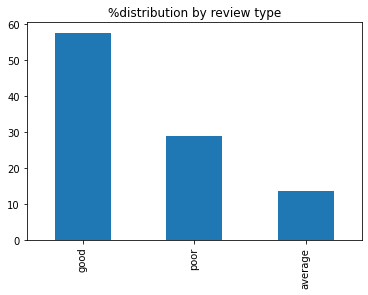

In [ ]:
%matplotlib inline
print('% for default')
print(round(df.rating.value_counts(normalize=True)*100,2))
round(df.rating.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('%distribution by review type')
plt.show()

#naive bayes

In [ ]:
stopset = set (stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True,strip_accents='ascii', stop_words=stopset)

In [ ]:
y = df.rating

In [ ]:
x = vectorizer.fit_transform (df.review)

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.01, random_state = 42)

In [ ]:
clf = naive_bayes.ComplementNB()
clf.fit(x_train, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [ ]:
test = pd.read_csv('Testset.csv', encoding = 'unicode_escape')
w = test.iloc[:, -1].values
rest_review_vector = vectorizer.transform(w)
print(type(rest_review_vector))
z = rest_review_vector
print(clf.predict(z))


<class 'scipy.sparse.csr.csr_matrix'>
[1 1 1 ... 1 0 1]


In [ ]:
test.drop(columns = ['review'], inplace = True)
test['rating']=pd.Series(clf.predict(z))


In [ ]:
test.head()

,id,rating
0,2437,1
1,3470,1
2,3867,1
3,1784,0
4,594,1


In [ ]:
test.to_csv('attempt5.csv')

#SVM

In [ ]:
test = pd.read_csv('Testset.csv', encoding = 'unicode_escape')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(df['review'])
test_vectors = vectorizer.transform(test['review'])

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, df['rating'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))


Training time: 2.412933s; Prediction time: 0.778158s


In [ ]:

for review in test.review:
  review_vector = vectorizer.transform([review]) # vectorizing
  answer = np.append(answer,classifier_linear.predict(review_vector))


len(answer)

  

2641

In [ ]:
test.drop(columns = ['review'], inplace = True)
test['rating']=pd.Series(answer)
test.head()

,id,rating
0,2437,good
1,3470,good
2,3867,good
3,1784,good
4,594,poor


In [ ]:
test.to_csv('attempt6.csv')

#random forest

In [ ]:
import re
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
features = df.iloc[:, 2].values
labels = df.iloc[:, 1].values

In [ ]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.000001, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=18000,max_depth=600, random_state=2)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=600, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
test = pd.read_csv('Testset.csv', encoding = 'unicode_escape')
w = test.iloc[:, -1].values
rest_review_vector = vectorizer.transform(w)
z = rest_review_vector
final_result = text_classifier.predict(z)
print(final_result)

['good' 'good' 'good' ... 'good' 'poor' 'good']


In [ ]:
test.drop(columns = ['review'], inplace = True)
test['rating']=pd.Series(final_result)
test.head()

,id,rating
0,2437,good
1,3470,good
2,3867,good
3,1784,poor
4,594,good


In [ ]:
test.to_csv('attempt.csv')

#Decision tree



In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10000000000, min_samples_split = 10)

clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10000000000, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [ ]:
test = pd.read_csv('Testset.csv', encoding = 'unicode_escape')
w = test.iloc[:, -1].values
rest_review_vector = vectorizer.transform(w)
z = rest_review_vector
final_result = clf_tree.predict(z)
print(final_result)

['good' 'good' 'good' ... 'good' 'poor' 'good']


In [ ]:
test.drop(columns = ['review'], inplace = True)
test['rating']=pd.Series(final_result)
test.head()

,id,rating
0,2437,good
1,3470,good
2,3867,good
3,1784,poor
4,594,good


In [ ]:
test.to_csv('attempt26.csv')

#gradient boost

In [ ]:
i = 29

In [ ]:
 from sklearn.ensemble import GradientBoostingClassifier
gra_boost = GradientBoostingClassifier(max_depth = 8, learning_rate = 0.1,n_estimators = 1000 ,random_state=0)
gra_boost.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
test = pd.read_csv('Testset.csv', encoding = 'unicode_escape')
w = test.iloc[:, -1].values
z = vectorizer.transform(w)
final_result = gra_boost.predict(z)
print(final_result)

['good' 'average' 'good' ... 'good' 'poor' 'good']


In [ ]:
test.drop(columns = ['review'], inplace = True)
test['rating']=pd.Series(final_result)
test.head()
i=i+1
str1 = 'attempt'+str(i)+'.csv'
test.to_csv(str1)